<a href="https://colab.research.google.com/github/Kridge42/Product-Sales/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

---
##### Kevin Ridge


Link to original data source:
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


## **Load and inspect data**



In [ ]:
# Mount drinve
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [ ]:
# Load data
sales_predictions ='/content/sales_predictions.csv'
df = pd.read_csv(sales_predictions)

In [ ]:
# Display the first five rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Display and inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Data Dictionary:**

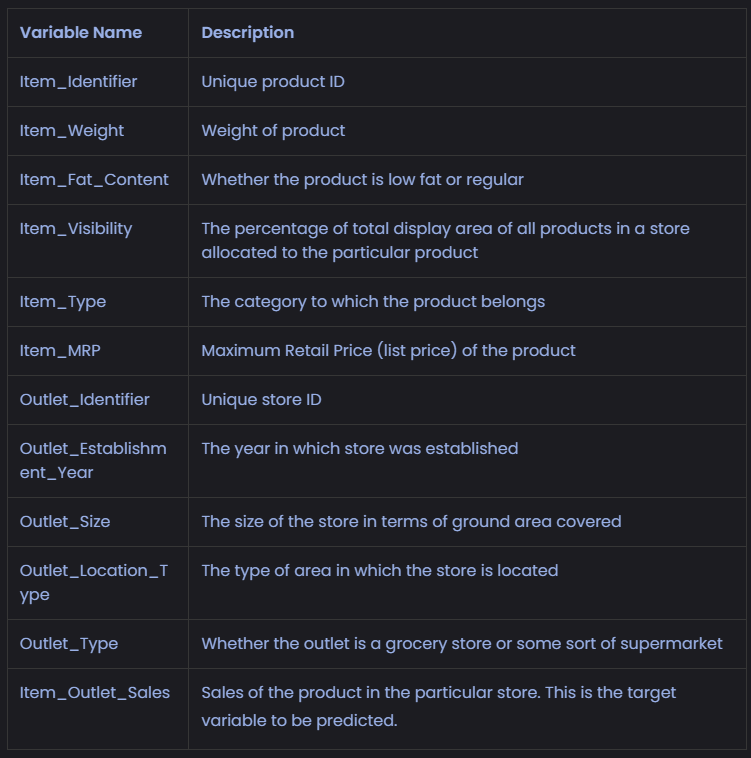

In [ ]:
# How many rows and columns
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 8523 rows and 12 columns.


In [ ]:
# Descriptive statistics for numeric columns
df.describe(include="number") 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##**Clean Data**

####  **Find duplicate rows and missing values**

In [ ]:
# Are there duplicates?
print(f'There are {df.duplicated().sum()} duplicate rows, no action required.')

There are 0 duplicate rows, no action required.


In [ ]:
# Missing values by column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

-  There are missing values for Item_Weight and Outlet_Size columns, I will investigate this further.

In [ ]:
# Percentage of missing values per column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [ ]:
# Unique values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Statistics for numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **Address missing values**
- Item Weight
 - I will address the Item Weight missing values by substituting the median value for that column. Item Weight is unlikely to affect the bottom line but I do want the missing entires filled with a median number to preserve data.
- Outlet Size
 - I will address the Outlet Size missing values by substituting the word "unknown" where NaN values are located. I use this method because outlet size can not be determined and I want to preserve the data points for these rows.

#### **Replace missing values in Item_Weight column**

In [ ]:
# Use median() to replace NaN values
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace= True)

#### **Replace missing values in Outlet_Size column**

In [ ]:
# Use "Unknown" string to replace Nan values
df['Outlet_Size'].fillna('Unknown', inplace= True)

#### **Confirm missing values are handled**

In [ ]:
# New information for data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Diplay rows with NaN values
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


- The missing values have been resolved.

#### **Identify inconsistent categories of data**

In [ ]:
# Display column names to check for errors
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

- No errors found in column names.

In [ ]:
# Inspect column values for errors
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- Upon inspecting the values of each column, I found inconsistent entries within Item_Fat_Content. 
  - I will replace irregular entries to fit either Low Fat or Regular categories.

In [ ]:
# Use .replace to eliminate odd categories
df.replace({'reg' : 'Regular', 'low fat' : 'Low Fat', 'LF' : 'Low Fat'}, inplace = True)

In [ ]:
# Display column in question
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Inconsistent categories resolved.

##**Exploratory Analysis**

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. 

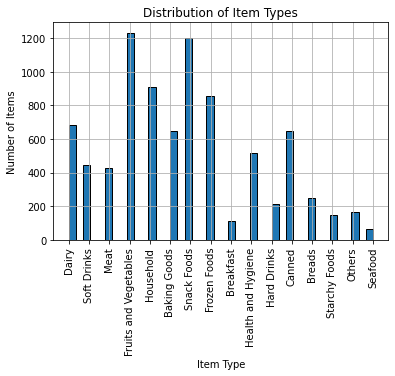

In [ ]:
# Create histogram for distribution of items
ax = df['Item_Type'].hist(bins = 42, edgecolor = "black")

ax.set_title('Distribution of Item Types')
ax.set_xlabel('Item Type')
ax.set_ylabel('Number of Items');
ax.tick_params(axis = 'x', rotation = 90);

- The distribution of item types shows a direct link for item demand based upon total numbers for what consumers are buying.

In [ ]:
# Create variable for item type
itypes = df.Item_Type.value_counts(ascending=False)

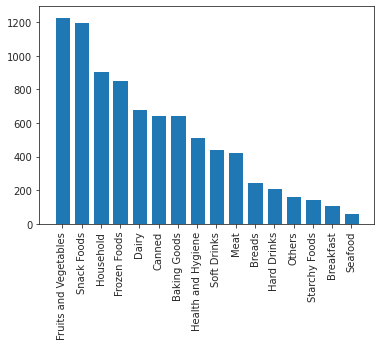

In [ ]:
# Create barplot for item type ype count
plt.bar(itypes.index, itypes.values)
plt.xticks(rotation=90);

- I can see the totals for items from the highest count of Fruits and Vegetables to lowest count of Seafood. 

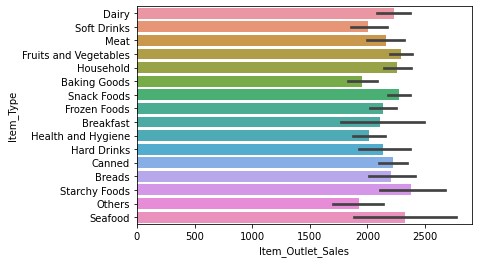

In [ ]:
# Create barplot for sales of items
sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');

####These barplots confirm that the item types are making similar net sales even though the item distribution numbers vary greatly. 
 - The lower item distribution numbers must have higher Item MRP in order to have similar sales numbers compared to items with more distribution.
 - I can conclude that the outlet inventory management is accurate and there is not much overhead waste.

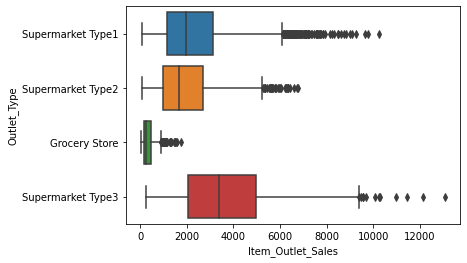

In [ ]:
# Create boxplot for outlet type sales
sns.boxplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales');

#### This boxplot displays which type of stores are totaling the most sales. 
- The Grocery Store sales are siginificantly lower than all four Outlet types.  - Supermarket Type 3 is the best selling type of outlet.
- Supermarkey Types 1 and 2 have similar sales. 
-  The outliers for each type of outlet could be due to several factors such as the city size, store location, and management.

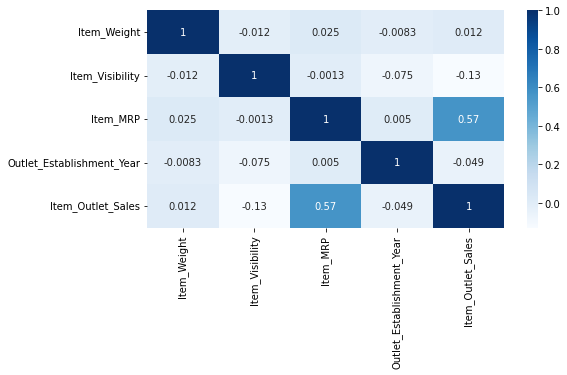

In [ ]:
# Create heatmap to show correlation
corr = df.corr()
fig, ax = plt.subplots(figsize = (8, 4))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

#### This Heatmap displays any correlation between the numeric columns of data. 
- The only correlation worth noting is the relationship between Item MRP and Item Outlet Sales.
- The price of an item and total sales are directly linked and this heat map displays that relationship well.

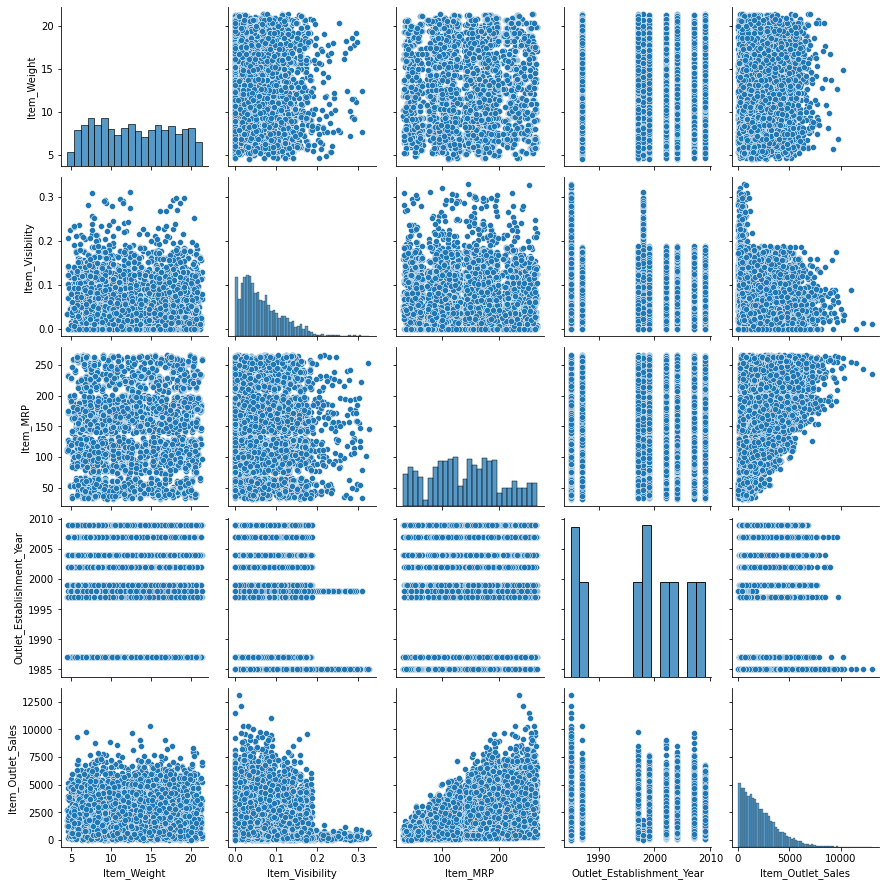

In [ ]:
# Create pairplot
sns.pairplot(df);

#### **The pairplot allows me to see if any big trends exist in the numerical data at a glance.**
- No particular points of interest stand alone in the pariplot. 

## **Explanatory Analysis**

Build data visualizations to help better understand trends in the data. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

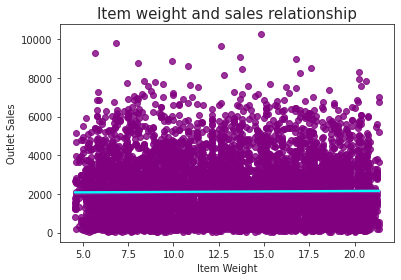

In [ ]:
# Create regplot for item weight
ax = sns.regplot(data = df,
            y = 'Item_Outlet_Sales',
            x = 'Item_Weight',
            scatter_kws = {'color': 'purple'},
            line_kws = {'color': 'cyan'});
ax.set_title('Item weight and sales relationship', fontsize = 15)
ax.set_xlabel('Item Weight')
ax.set_ylabel('Outlet Sales')
plt.show()

#### **This regression plot confirms the median values added for item weight have not negatively skewed the data for sales.**
-  The flat line shows there is no correlation between the weight of an item and the outlet sales. 

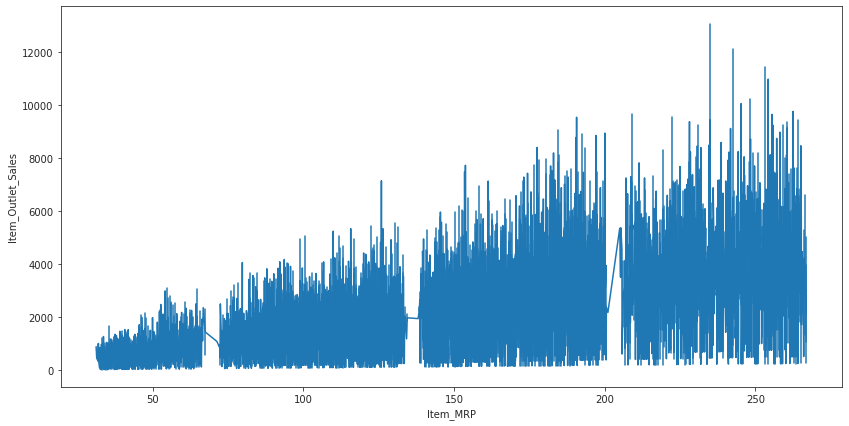

In [ ]:
# Create sales visual
plt.figure(figsize = (14,7))
sns.lineplot(data = df, y = 'Item_Outlet_Sales', x = 'Item_MRP', err_style = 'bars',);

#### **This lineplot examines the listed MRP price and the item oultet sales.**
 - I see positive correlation with item outlet sales generally increasing as item MRP is higher. While this is not true for every item, the total sales of an item is closely related to the listed item MRP. 
  - Some items underperform compared to the average trend and some items overperform.
  - I can assume high demand for food items and discounted items. Item MRP for foods and discounts should reflect the supply and demand of individual markets.
  -  Adjustments for select item MRP could show positive shifts for more sales of those particular items.

#**Prevent Data Leakage**

- The next part will go back to the original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

In [ ]:
# Import additional libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create new dataframe
sales_predictions1 ='/content/drive/MyDrive/Data/sales_predictions.csv'
df1 = pd.read_csv(sales_predictions1)

In [ ]:
# Display and inspect data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Check for dupliicates
df1.duplicated().sum()

0

In [ ]:
# Check for missing values
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- The missing values will be handled in a pipeline

#### **Correct inconsistent column**

In [ ]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df1.replace({'reg' : 'Regular', 'low fat' : 'Low Fat', 'LF' : 'Low Fat'}, inplace = True)

In [ ]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####**Validation Split**

In [ ]:
# # Define target (y) and features (X). Train, test, split the data.
target = 'Item_Outlet_Sales'
y = df1[target]
X = df1.drop(columns =['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Identifier'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- I chose to drop a few features that have very little correlation with Item Outlet Sales.

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


####**Instantiate Column Selectors and Transformers**

In [ ]:
# Create column selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [ ]:
# Create Imputers
con_imp = SimpleImputer(strategy='constant', fill_value='Missing')
med_imp = SimpleImputer(strategy='median')

In [ ]:
# Create scaler
scaler = StandardScaler()

In [ ]:
# Create One hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

####**Instantiate Pipelines**

In [ ]:
# Create numerical pipeline
num_pipe = make_pipeline(med_imp, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Create categorical pipeline
cat_pipe = make_pipeline(con_imp, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

####**Instantiate ColumnTransformer**

In [ ]:
# Create Tuples
num_tup = (num_pipe, num_sel)
cat_tup = (cat_pipe, cat_sel)
# Create ColumnTransformer
preprocessor = make_column_transformer(num_tup, cat_tup, verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb040>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb580>)],
                  verbose_feature_names_out=False)

In [ ]:
# Fit on train data
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb040>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb580>)],
                  verbose_feature_names_out=False)

In [ ]:
# Transform both train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')

0 missing values in training data
0 missing values in testing data


In [ ]:
# Datatype and column check to see if data is one hot encoded
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)

All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 35)


In [ ]:
X_train_processed

array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
names = preprocessor.get_feature_names_out()
names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Missing', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
# Display head of X_train data
X_train_df1 = pd.DataFrame(X_train_processed, columns = names)
X_train_df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.827485,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.566644,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.121028,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.158464,-1.004931,-0.952591,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.538870,-0.965484,-0.336460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## **Linear Regression Model**

In [ ]:
# Create linear regression model, preprocessor, and pipeline
line_reg = LinearRegression()
line_reg_pipe = make_pipeline(preprocessor, line_reg)
line_reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb040>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb580>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Create predictions for training and testing data
line_reg_train_pred = line_reg_pipe.predict(X_train)
line_reg_test_pred = line_reg_pipe.predict(X_test)

In [ ]:
# Create r2 scores for training and testing data
train_r2 = r2_score(y_train, line_reg_train_pred)
test_r2 = r2_score(y_test, line_reg_test_pred)

print(f'Model Train R2: {train_r2}')
print(f'Model Test R2: {test_r2}')

Model Train R2: 0.5612955527996222
Model Test R2: 0.5658722143207962


- Varianace is similar on the train and test data. To run a better model, I would need more relevant features other than Item_MRP. 

In [ ]:
train_RMSE = np.sqrt(mean_squared_error(y_train, line_reg_train_pred ))
test_RMSE = np.sqrt(mean_squared_error(y_test, line_reg_test_pred ))

print(f'Model Train RMSE: {train_RMSE}')
print(f'Model Test RMSE: {test_RMSE}')

Model Train RMSE: 1139.4412573135698
Model Test RMSE: 1094.4170597604545


##**Random Forest Model**

In [ ]:
# Create RandomForest model, preprocessor, and pipeline
rf = RandomForestRegressor()
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb040>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6fc0bb580>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
# Display Max Depth
est = [estimator.get_depth() for estimator in rf.estimators_]
max(est)

45

In [ ]:
depth_range = range(1, max(est))

In [ ]:
scoredf = pd.DataFrame(index=depth_range, columns=['Test Score', 'Train Score'])

In [ ]:
# Loop to run at each depth
for depth in depth_range:
  rf = RandomForestRegressor(max_depth=depth, random_state=42)
  rf_pipe = make_pipeline(preprocessor, rf)
  rf_pipe.fit(X_train, y_train)
  train_score = rf_pipe.score(X_train, y_train)
  test_score = rf_pipe.score(X_test, y_test)
  scoredf.loc[depth, 'Train Score'] = train_score
  scoredf.loc[depth, 'Test Score'] = test_score
scoredf.head()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

,Test Score,Train Score
1,0.243857,0.253582
2,0.465954,0.462651
3,0.545216,0.544065
4,0.596634,0.595925
5,0.602762,0.610588


####**Display the top 5 performing depths**

In [ ]:
sort_score = scoredf.sort_values(by='Test Score', ascending=False)

In [ ]:
sort_score.head()

,Test Score,Train Score
5,0.602762,0.610588
6,0.601444,0.62438
7,0.597894,0.642645
8,0.596849,0.665011
4,0.596634,0.595925


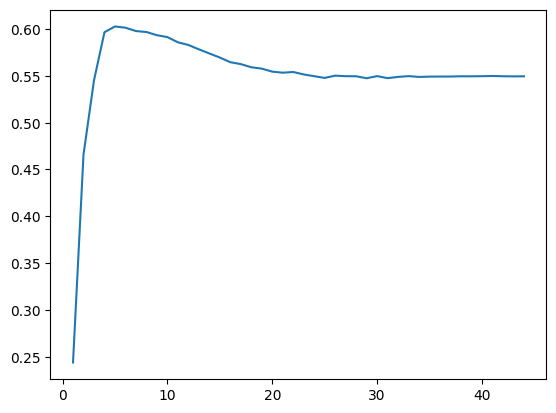

In [ ]:
plt.plot(scoredf['Test Score'])

In [ ]:
# Fit the best performer
rf_tuned = RandomForestRegressor(max_depth = 5, random_state=42)
rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)
rf_tuned_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7189febc40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7189feb910>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [ ]:
rf_train_pred = rf_tuned_pipe.predict(X_train)
rf_test_pred = rf_tuned_pipe.predict(X_test)

In [ ]:
train_rf = r2_score(y_train, rf_train_pred)
test_rf = r2_score(y_test, rf_test_pred)

print(f'Train R2: {train_rf}')
print(f'Trest R2: {test_rf}')

Train R2: 0.6105875595748633
Trest R2: 0.6027622531659373


In [ ]:
rf_train_RMSE = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_RMSE = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print(f'Train RMSE: {rf_train_RMSE}')
print(f'Test RMSE: {rf_test_RMSE}')

Train RMSE: 1073.5217129754662
Test RMSE: 1046.8858206006369


## **Model Comments**

- Both models return suboptimal accuracy
 - The random forest model performs at 60.27% and the linear regression model at 56.59%. 
 - The model to implement would be the random forest regression tree. 
 - Overall, I recommend more data that correlates well with Item Outlet Sales. 
 - The features at hand are not going to give any model the opportunity to predict with a high degree of accuracy.
